In [1]:
import rasterio
from rasterio import plot
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dirpath = "bear_fire_2_9_2020_psscene4band_analytic_sr_udm2/files"
out_fp = "bear_fire_mosaic.tif"
search_criteria = "*SR_clip.tif"
q = os.path.join(dirpath, search_criteria)
print(q)

bear_fire_2_9_2020_psscene4band_analytic_sr_udm2/files/*SR_clip.tif


In [3]:
dem_fps = glob.glob(q)
dem_fps

['bear_fire_2_9_2020_psscene4band_analytic_sr_udm2/files/20200209_184453_0f35_3B_AnalyticMS_SR_clip.tif',
 'bear_fire_2_9_2020_psscene4band_analytic_sr_udm2/files/20200209_184452_0f35_3B_AnalyticMS_SR_clip.tif']

In [4]:
src_files_to_mosaic = []
problem_files = []
for fp in dem_fps:
    try:
        src_files_to_mosaic.append(rasterio.open(fp))
    except:
        problem_files.append(fp)
        
src_files_to_mosaic

[<open DatasetReader name='bear_fire_2_9_2020_psscene4band_analytic_sr_udm2/files/20200209_184453_0f35_3B_AnalyticMS_SR_clip.tif' mode='r'>,
 <open DatasetReader name='bear_fire_2_9_2020_psscene4band_analytic_sr_udm2/files/20200209_184452_0f35_3B_AnalyticMS_SR_clip.tif' mode='r'>]

In [5]:
problem_files

[]

In [6]:
from rasterio.merge import merge

In [7]:
mosaic, out_trans = merge(src_files_to_mosaic)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


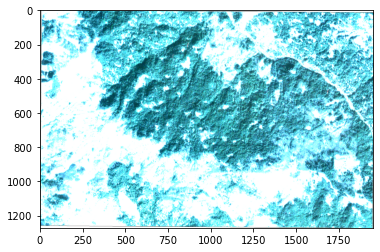

<AxesSubplot:>

In [8]:
rasterio.plot.show(mosaic, cmap='terrain')

In [9]:
SR_tif = rasterio.open('bear_fire_2_9_2020_psscene4band_analytic_sr_udm2/files/20200209_184452_0f35_3B_AnalyticMS_SR_clip.tif')

In [10]:
red = SR_tif.read(3)
nir = SR_tif.read(4)

In [11]:
ndvi = np.where(
    (nir+red)==0,
    0,
    (nir-red)/(nir+red)
)

/var/folders/pr/x209szxj12dfmrblnp67swc80000gn/T/ipykernel_86011/459936051.py:4: RuntimeWarning: invalid value encountered in true_divide
  (nir-red)/(nir+red)


In [12]:
ndvi_image = rasterio.open('ndvi_image_2_9_2020.tiff', 'w', driver='Gtiff', 
                           width=SR_tif.width, height=SR_tif.height, 
                          count=1, crs=SR_tif.crs, transform=SR_tif.transform,
                          dtype='float64')
ndvi_image.write(ndvi, 1)
ndvi_image.close()

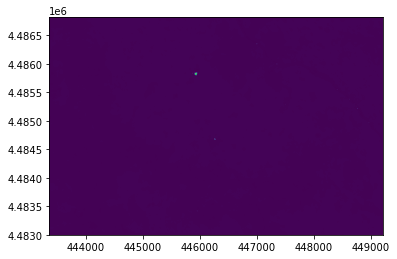

<AxesSubplot:>

In [13]:
ndvi = rasterio.open('ndvi_image_2_9_2020.tiff')
plot.show(ndvi)

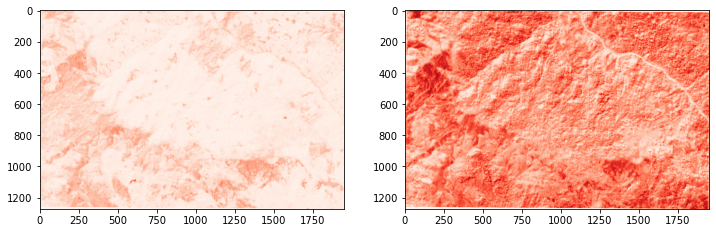

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.imshow(red, cmap='Reds')
ax2.imshow(nir, cmap='Reds')

In [15]:
dirpath2 = "bear_fire_2_18_2020_psscene4band_analytic_sr_udm2/files"
out_fp2 = "bear_fire_mosaic2.tif"
search_criteria2 = "*SR_clip.tif"
q2 = os.path.join(dirpath2, search_criteria2)
print(q2)

bear_fire_2_18_2020_psscene4band_analytic_sr_udm2/files/*SR_clip.tif


In [16]:
dem_fps2 = glob.glob(q2)
dem_fps2

['bear_fire_2_18_2020_psscene4band_analytic_sr_udm2/files/20200218_184221_100a_3B_AnalyticMS_SR_clip.tif',
 'bear_fire_2_18_2020_psscene4band_analytic_sr_udm2/files/20200218_190649_25_1057_3B_AnalyticMS_SR_clip.tif',
 'bear_fire_2_18_2020_psscene4band_analytic_sr_udm2/files/20200218_184220_100a_3B_AnalyticMS_SR_clip.tif']

In [17]:
src_files_to_mosaic2 = []
problem_files2 = []
for fp in dem_fps2:
    try:
        src_files_to_mosaic2.append(rasterio.open(fp))
    except:
        problem_files2.append(fp)
        
src_files_to_mosaic2

[<open DatasetReader name='bear_fire_2_18_2020_psscene4band_analytic_sr_udm2/files/20200218_184221_100a_3B_AnalyticMS_SR_clip.tif' mode='r'>,
 <open DatasetReader name='bear_fire_2_18_2020_psscene4band_analytic_sr_udm2/files/20200218_190649_25_1057_3B_AnalyticMS_SR_clip.tif' mode='r'>,
 <open DatasetReader name='bear_fire_2_18_2020_psscene4band_analytic_sr_udm2/files/20200218_184220_100a_3B_AnalyticMS_SR_clip.tif' mode='r'>]

In [18]:
problem_files2

[]

In [19]:
mosaic2, out_trans2 = merge(src_files_to_mosaic2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


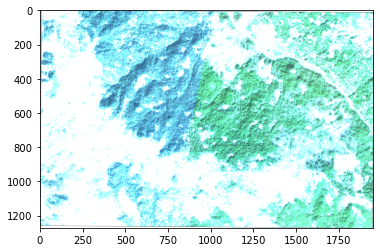

<AxesSubplot:>

In [20]:
rasterio.plot.show(mosaic2, cmap='terrain')

In [21]:
SR_tif2 = rasterio.open('bear_fire_2_18_2020_psscene4band_analytic_sr_udm2/files/20200218_184221_100a_3B_AnalyticMS_SR_clip.tif')

In [22]:
red2 = SR_tif2.read(3)
nir2 = SR_tif2.read(4)

ndvi2 = np.where(
    (nir2+red2)==0,
    0,
    (nir2-red2)/(nir2+red2)
)

ndvi_image2 = rasterio.open('ndvi_image_2_18_2020.tiff', 'w', driver='Gtiff', 
                           width=SR_tif2.width, height=SR_tif2.height, 
                          count=1, crs=SR_tif2.crs, transform=SR_tif2.transform,
                          dtype='float64')
ndvi_image2.write(ndvi2, 1)
ndvi_image2.close()

/var/folders/pr/x209szxj12dfmrblnp67swc80000gn/T/ipykernel_86011/56423377.py:7: RuntimeWarning: invalid value encountered in true_divide
  (nir2-red2)/(nir2+red2)


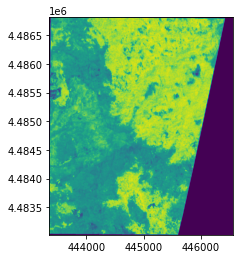

<AxesSubplot:>

In [23]:
ndvi2 = rasterio.open('ndvi_image_2_18_2020.tiff')
plot.show(ndvi2)

In [24]:
with SR_tif2 as src:
    out_meta = src.meta.copy()    
out_meta.update({"driver": "GTiff",
                 "height": mosaic2.shape[1],
                 "width": mosaic2.shape[2],
                 "transform": out_trans2})
with rasterio.open("mergedRasters.tif", "w", **out_meta) as dest1:
        dest1.write(mosaic2)

In [25]:
merged = rasterio.open('mergedRasters.tif')

In [26]:
red2 = merged.read(3)
nir2 = merged.read(4)

ndvi2 = np.where((nir2+red2)>0, (nir2-red2)/(nir2+red2), 0)

ndvi_image2 = rasterio.open('mergedRastersNDVI.tif', 'w', driver='Gtiff', 
                           width=merged.width, height=merged.height, 
                          count=1, crs=merged.crs, transform=merged.transform,
                          dtype='float64')
ndvi_image2.write(ndvi2, 1)
ndvi_image2.close()

/var/folders/pr/x209szxj12dfmrblnp67swc80000gn/T/ipykernel_86011/3190062557.py:4: RuntimeWarning: invalid value encountered in true_divide
  ndvi2 = np.where((nir2+red2)>0, (nir2-red2)/(nir2+red2), 0)


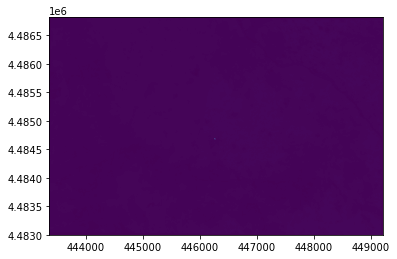

<AxesSubplot:>

In [27]:
ndvi = rasterio.open('mergedRastersNDVI.tif')
plot.show(ndvi)